# Basic image classification

We are going to use an off the shelf model to complete detection and classification on an image

Uses a pretrained Pytorch Faster R-CNN ResNet-50 FPN model.

## Import our dependencies

In [1]:
from detecto.core import Model
from detecto import utils, visualize
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch

## Create a model and read in the image

In [2]:
model = Model()
#image = utils.read_image('https://lh3.googleusercontent.com/AjO8yHjIb8m2l4GHNASs_UUHQ8KdxMjmXL_G64k21bX2q7ypyjKioa-aA44vE4sGLOR77zLfxXDS6XZ7jUBblAiv3KWcZBWegqHkDsyxxeRaDn9ccUPHHzEu_mEvkt-yaopHQlFmayPuh2EktAfRIoQbmWrOq2byvs5M21ZHpWvtSi9lXL61GpPZdDse-t2lox6LWstTjFVt7IclcX0NMhlqdMoJbGr8BYOsJjkuiVRBY1oVSDZ035EuxMam3FYmoGTyng8Fv6jRwOwz_EAre2b_5Mm7CGXJql7mAQuAS6vmgf3T5O7F2of6bmEc9dwblrpdNl3UmBiYo0i9YvB0xcHc6QiZMNCAuvtqPQpyNdE7imOqq05M3adMCLjQ2PZZpEGCQxkHzuRvCnfHQPBjxas6AJPkA4eiSfKdQMkVVrE7TrGbbBMjg0w2
image = utils.read_image('./images/classifier.jpg')

## Run some predictions

In [3]:
predictions = model.predict(image)

## Create some helper functions for predictions

In [4]:
def filter_predictions(predictions, threshold=0.7, max_threshold=1):
    labels, boxes, scores = predictions
    filtered_labels = []
    filtered_boxes = []
    filtered_scores = []
    for i, s in enumerate(scores):

        # Loop through each unique label
        if s > threshold and s <= max_threshold:
            filtered_labels.append(labels[i])
            filtered_boxes.append(boxes[i])
            filtered_scores.append(scores[i])

    if len(filtered_labels) == 0:
        return filtered_labels, torch.empty(0, 4), torch.tensor(filtered_scores)
    return filtered_labels, torch.stack(filtered_boxes), torch.tensor(filtered_scores)

def show_labeled_image(image, boxes, labels=None):
    fig, ax = plt.subplots(1, figsize=(15,15))
    plt.rcParams.update({'font.size': 22})
    # If the image is already a tensor, convert it back to a PILImage
    # and reverse normalize it
    if isinstance(image, torch.Tensor):
        image = reverse_normalize(image)
        image = transforms.ToPILImage()(image)
    ax.imshow(image)

    # Show a single box or multiple if provided
    if boxes.ndim == 1:
        boxes = boxes.view(1, 4)

    # Plot each box
    for i in range(boxes.shape[0]):
        box = boxes[i]
        width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
        initial_pos = (box[0].item(), box[1].item())
        rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
        if labels:
            ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

        ax.add_patch(rect)
    plt.show()
    

In [5]:
confident_predictions = filter_predictions(predictions, 0.65, 0.96)
confident_predictions

(['spoon', 'sink'],
 tensor([[ 439.8682, 1107.3043,  745.9217, 1405.4032],
         [  30.1497,  104.4943, 1385.1104, 1741.3147]]),
 tensor([0.7755, 0.7318]))

## Visualise the output

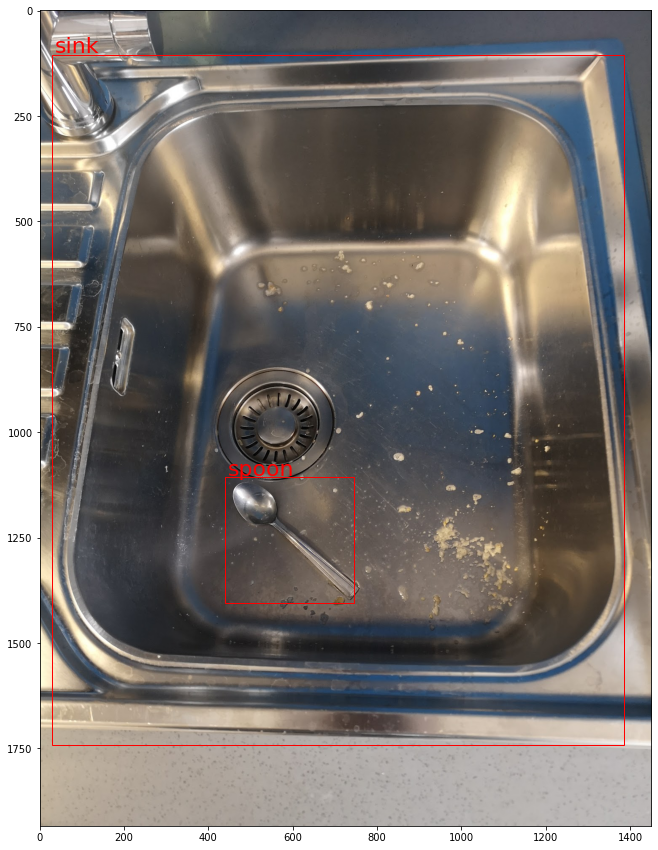

In [6]:
labels, boxes, score = confident_predictions
show_labeled_image(image, boxes, labels) 
